<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumApplicationAlgorithm_VQA_QAOA(TSP_4x4QUBO)_mkbahk_20260203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python 3.9 ~ 3.11 환경에서 아래 순서대로 설치
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install qiskit-algorithms==0.3.1
%pip install qiskit-optimization==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 15.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=012955fb7bc4353f379863f22a41e80d285e7ee947fff8f9212691f41fbcdca1
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.4/647.4 kB 16.4 MB/s eta 0:00:00
  Installing build dependencies 

In [7]:
# 필요한 패키지 설치 (터미널에서 실행)
# pip install qiskit qiskit-optimization qiskit-aer qiskit-algorithms

from qiskit_optimization.applications import Tsp
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_algorithms.minimum_eigensolvers import QAOA # Updated import
from qiskit_algorithms.optimizers import COBYLA # Updated import
from qiskit.primitives import Sampler # Corrected import for Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#1. 4x4 TSP 문제 정의
adj_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])
tsp = Tsp(adj_matrix)
qp = tsp.to_quadratic_program()

In [9]:
# 2. QUBO 형식으로 변환 (제약 조건을 에너지 식으로 통합)
from qiskit_optimization.converters import QuadraticProgramToQubo
conv = QuadraticProgramToQubo()
qubo = conv.convert(qp)

In [10]:
# 3. QUBO 행렬 추출 (Q-matrix)
# 16개의 변수(4도시 x 4순서)에 대한 16x16 행렬이 생성됩니다.
q_matrix = qubo.objective.quadratic.to_array()
linear_parts = qubo.objective.linear.to_array()

# 대각 성분에 선형 항(Linear terms)을 더해 시각화용 행렬 완성
for i in range(len(linear_parts)):
    q_matrix[i, i] += linear_parts[i]
###for

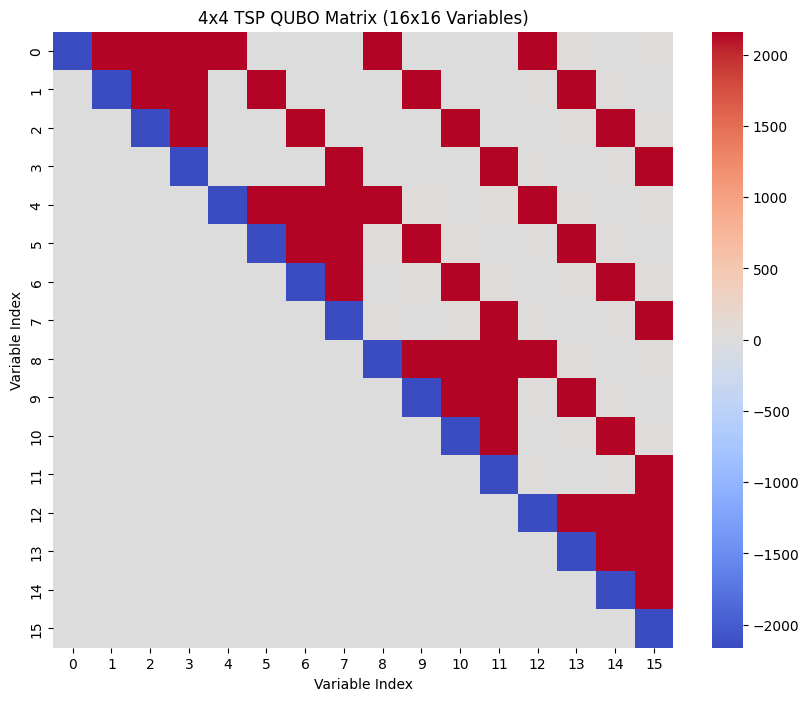

In [11]:
# 4. 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(q_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("4x4 TSP QUBO Matrix (16x16 Variables)")
plt.xlabel("Variable Index")
plt.ylabel("Variable Index")
plt.show()